In [3]:
# Dependencies and Setup
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.stats import linregress

In [4]:
# Files to load
heart_data = pd.read_csv("./heart.csv")
heart_predict = pd.read_csv("./Heart_Disease_Prediction.csv")


In [5]:
# assign heart_data DataFrame
heart_data_df = pd.DataFrame(heart_data)

# assign heart_predict dataframe

heart_predict_df = pd.DataFrame(heart_predict)

In [6]:
#disply heart_data DataFrame
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
#disply heart_predict DataFrame
heart_predict_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [8]:
test = heart_predict_df

In [9]:
test = test.replace({'Heart Disease': 'Presence'},1)
test = test.replace({'Heart Disease': 'Absence'},0)
test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [10]:
# columns
print(heart_predict.columns
     )

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [11]:
#disply heart_data_df
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
heart_data_df_cc = heart_data_df.rename(columns={"age": "Age",
                                              "sex": "Sex",                                               
                                              "cp": "Chest pain type",
                                              "trestbps": "BP",   
                                              "chol": "Cholesterol",
                                              "fbs": "FBS over 120",
                                             "exang": "Exercise angina",
                                                "ca": "Number of vessels fluro",
                                                "target": "Heart Disease"})
#disply
heart_data_df_cc

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,restecg,thalach,Exercise angina,oldpeak,slope,Number of vessels fluro,thal,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
# merge heart data w/ corrected columns with heart predict dataframe
heart_data_merge = pd.merge(test, heart_data_df_cc, how="outer", on=['Age', 
                                                                                 "Sex",
                                                                                 "Chest pain type",
                                                                                 "BP",
                                                                                 "Cholesterol",
                                                                                 "FBS over 120",
                                                                                 "Exercise angina",
                                                                                "Number of vessels fluro",
                                                                                 "Heart Disease"
                                                                                ])

# display
heart_data_merge


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,restecg,thalach,oldpeak,slope,thal
0,70,1,4,130,322,0,2.0,109.0,0,2.4,2.0,3,3.0,1,NaN,NaN,NaN,NaN,NaN
1,67,0,3,115,564,0,2.0,160.0,0,1.6,2.0,0,7.0,0,NaN,NaN,NaN,NaN,NaN
2,57,1,2,124,261,0,0.0,141.0,0,0.3,1.0,0,7.0,1,NaN,NaN,NaN,NaN,NaN
3,64,1,4,128,263,0,0.0,105.0,1,0.2,2.0,1,7.0,0,NaN,NaN,NaN,NaN,NaN
4,74,0,2,120,269,0,2.0,121.0,1,0.2,1.0,1,3.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,59,1,3,160,273,0,NaN,NaN,0,NaN,NaN,0,NaN,0,0.0,125.0,0.0,2.0,2.0
1291,59,1,3,160,273,0,NaN,NaN,0,NaN,NaN,0,NaN,0,0.0,125.0,0.0,2.0,2.0
1292,54,1,0,120,188,0,NaN,NaN,0,NaN,NaN,1,NaN,0,1.0,113.0,1.4,1.0,3.0
1293,54,1,0,120,188,0,NaN,NaN,0,NaN,NaN,1,NaN,0,1.0,113.0,1.4,1.0,3.0


In [14]:
# checking for NaN values in merge dataframe
nan_columns = heart_data_merge.isna().any()
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                 True
Max HR                      True
Exercise angina            False
ST depression               True
Slope of ST                 True
Number of vessels fluro    False
Thallium                    True
Heart Disease              False
restecg                     True
thalach                     True
oldpeak                     True
slope                       True
thal                        True
dtype: bool


In [15]:
# removing NaN columns from dataframe
heart_data_dn = heart_data_merge.dropna(axis=1)

# disply data w/o NaN
heart_data_dn


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Exercise angina,Number of vessels fluro,Heart Disease
0,70,1,4,130,322,0,0,3,1
1,67,0,3,115,564,0,0,0,0
2,57,1,2,124,261,0,0,0,1
3,64,1,4,128,263,0,1,1,0
4,74,0,2,120,269,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1290,59,1,3,160,273,0,0,0,0
1291,59,1,3,160,273,0,0,0,0
1292,54,1,0,120,188,0,0,1,0
1293,54,1,0,120,188,0,0,1,0


In [16]:
# Check for duplicate rows
duplicate_rows = heart_data_dn.duplicated()

# Print the duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
1290     True
1291     True
1292    False
1293     True
1294     True
Length: 1295, dtype: bool


In [17]:
# drop duplicate rows
heart_data_clean = heart_data_dn.drop_duplicates()

# disply df
heart_data_clean

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Exercise angina,Number of vessels fluro,Heart Disease
0,70,1,4,130,322,0,0,3,1
1,67,0,3,115,564,0,0,0,0
2,57,1,2,124,261,0,0,0,1
3,64,1,4,128,263,0,1,1,0
4,74,0,2,120,269,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1280,68,0,2,120,211,0,0,0,1
1283,44,0,2,108,141,0,0,0,1
1286,52,1,0,128,255,0,1,1,0
1289,59,1,3,160,273,0,0,0,0


In [18]:
# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 723


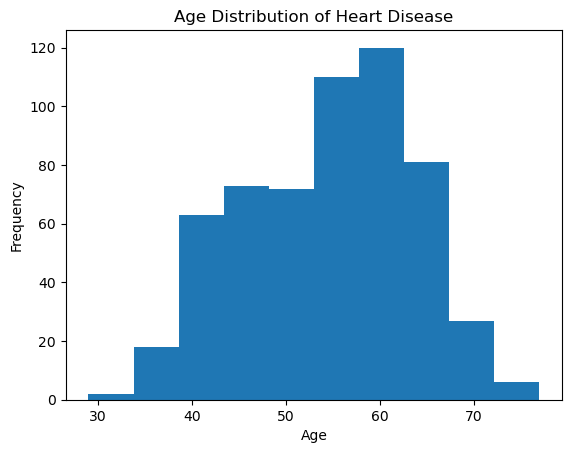

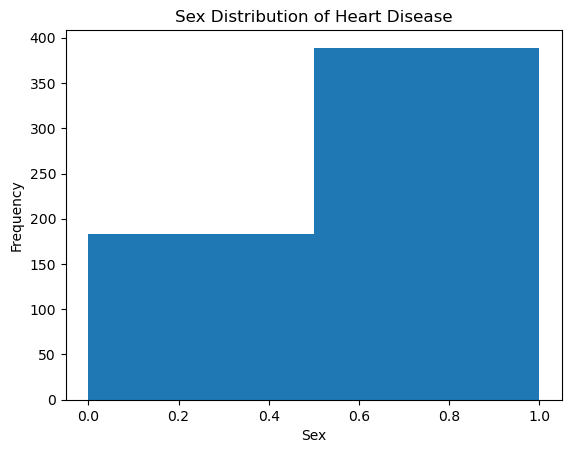

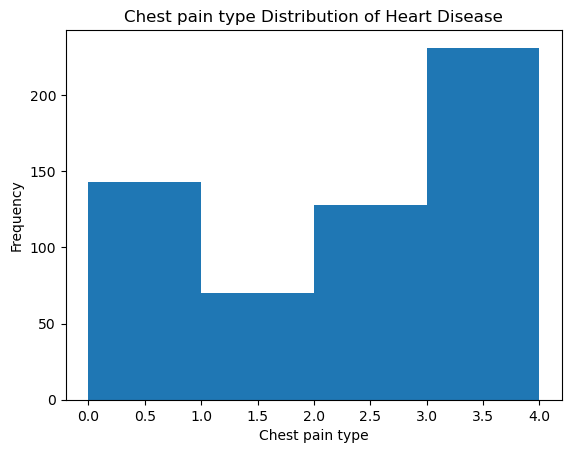

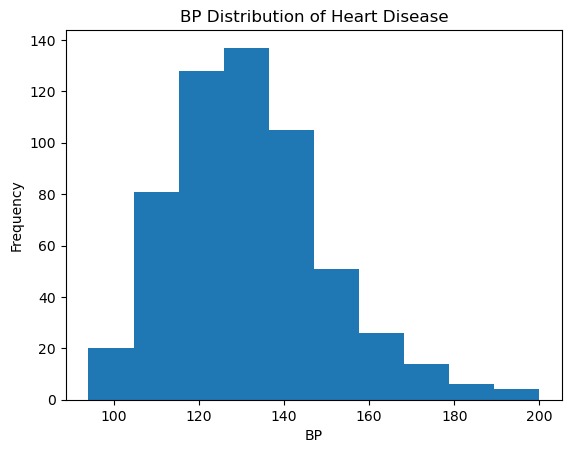

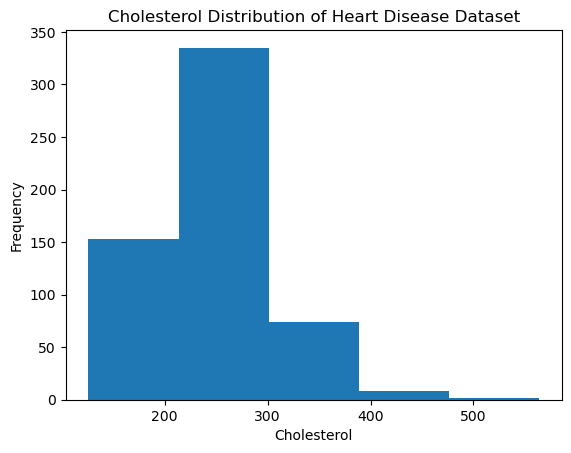

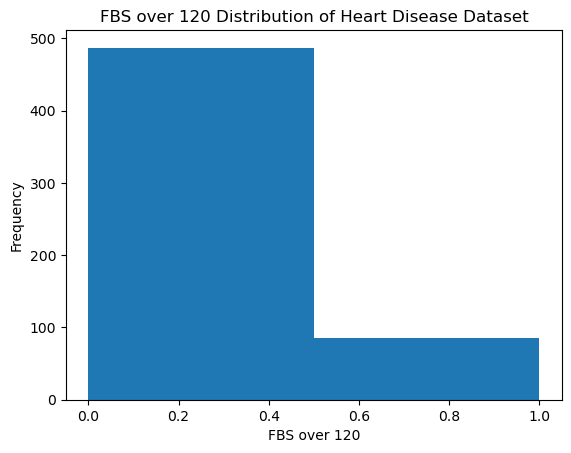

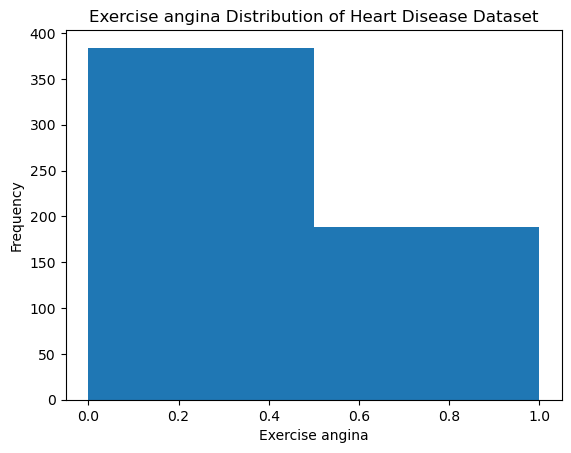

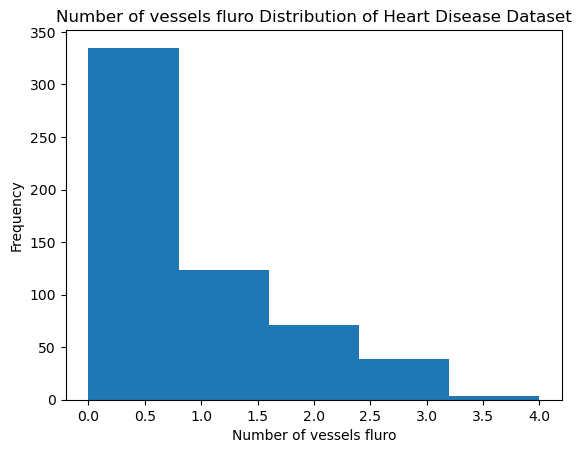

In [19]:
#Disply Histogram of each column

# Age Hist.
plt.hist(heart_data_clean['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Heart Disease')
plt.savefig("./Fig1.png")
plt.show()

#Sex Histogram
plt.hist(heart_data_clean['Sex'], bins=2)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Distribution of Heart Disease')
plt.savefig("./Fig2.png")
plt.show()

# Chest pain type Histogram
plt.hist(heart_data_clean['Chest pain type'], bins=4)
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.title('Chest pain type Distribution of Heart Disease')
plt.savefig("./Fig3.png")
plt.show()


plt.hist(heart_data_clean['BP'], bins=10)
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.title('BP Distribution of Heart Disease')
plt.savefig("./Fig4.png")
plt.show()


plt.hist(heart_data_clean['Cholesterol'], bins=5)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution of Heart Disease Dataset')
plt.savefig("./Fig5.png")
plt.show()


plt.hist(heart_data_clean['FBS over 120'], bins=2)
plt.xlabel('FBS over 120')
plt.ylabel('Frequency')
plt.title('FBS over 120 Distribution of Heart Disease Dataset')
plt.savefig("./Fig6.png")
plt.show()


plt.hist(heart_data_clean['Exercise angina'], bins=2)
plt.xlabel('Exercise angina')
plt.ylabel('Frequency')
plt.title('Exercise angina Distribution of Heart Disease Dataset')
plt.savefig("./Fig7.png")
plt.show()


plt.hist(heart_data_clean['Number of vessels fluro'], bins=5)
plt.xlabel('Number of vessels fluro')
plt.ylabel('Frequency')
plt.title('Number of vessels fluro Distribution of Heart Disease Dataset')
plt.savefig("./Fig8.png")
plt.show()

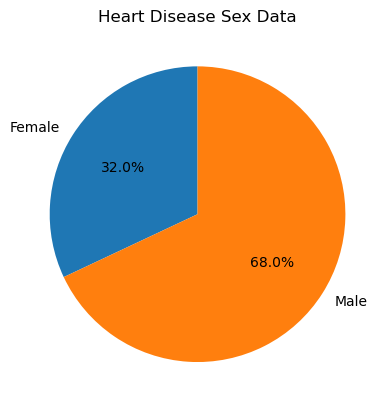

In [20]:
grouped_sex= heart_data_clean.groupby('Sex').size()
labels = ['Female', 'Male']
sizes = grouped_sex.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Sex Data')
# Print the grouped data
#print(grouped_sex)
# Save the figure
plt.savefig("./Fig9.png")
plt.show()

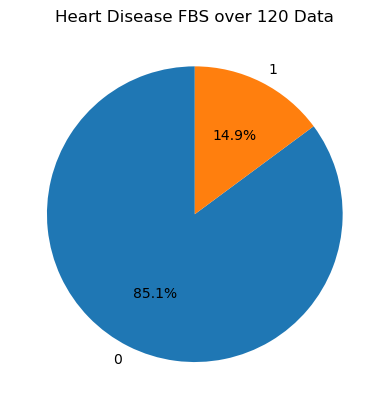

In [21]:
grouped_FBS= heart_data_clean.groupby('FBS over 120').size()
labels = ['0', '1']
sizes = grouped_FBS.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease FBS over 120 Data')
# Save the figure
plt.savefig("./Fig10.png")
plt.show()

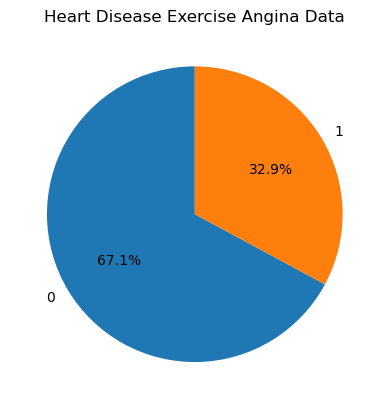

In [22]:
grouped_EA= heart_data_clean.groupby('Exercise angina').size()
labels = ['0', '1']
sizes = grouped_EA.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Exercise Angina Data')
# Save the figure
plt.savefig("./Fig11.png")
plt.show()

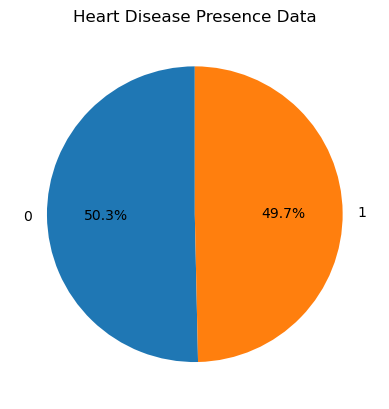

In [27]:
grouped_EA= heart_data_clean.groupby('Heart Disease').size()
labels = ['0', '1']
sizes = grouped_EA.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Presence Data')
# Save the figure
plt.savefig("./Fig14.png")
plt.show()

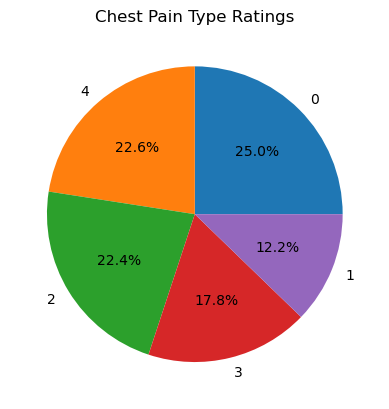

In [28]:
# Count the number of each type of chest pain rating
chest_pain_counts = heart_data_clean['Chest pain type'].value_counts()

# Create a pie chart
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%')
plt.title('Chest Pain Type Ratings')
plt.show()

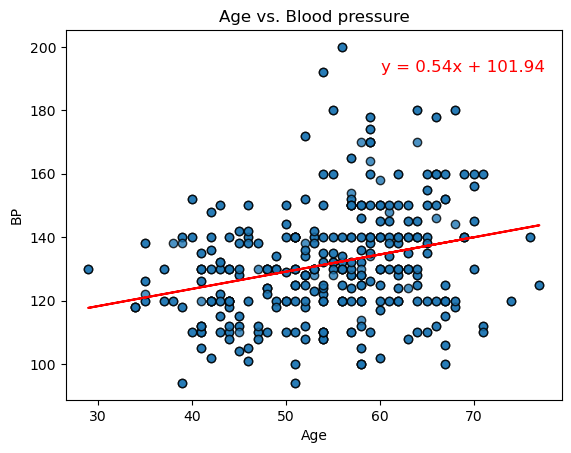

In [23]:
x = heart_data_clean['Age']
y = heart_data_clean['BP']
# Perform linear regression to get the line equation
coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
# Create the regression line
regression_line = m * x + b
# Plot the scatter plot
plt.scatter(x, y, alpha=0.8, edgecolor='black', linewidth=1.0)
# Plot the regression line
plt.plot(x, regression_line, color='red')
# Set the plot title and axis labels
plt.title('Age vs. Blood pressure')
plt.xlabel('Age')
plt.ylabel('BP')
# Add the equation of the regression line as text to the graph
equation_text = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.8, 0.9, equation_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')
# Save the figure
plt.savefig("./Fig12.png")
# Show the plot
plt.show() 

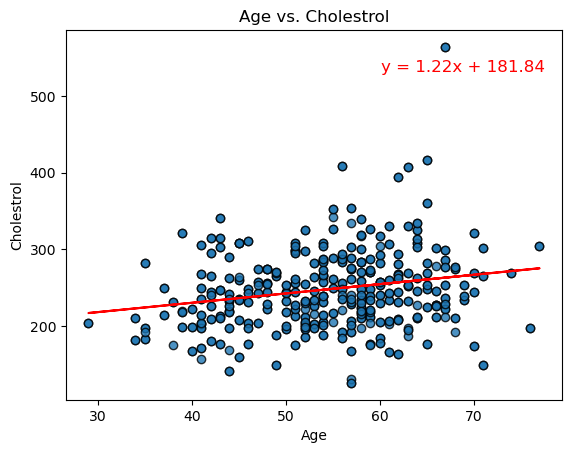

In [24]:
x = heart_data_clean['Age']
y = heart_data_clean['Cholesterol']
# Perform linear regression to get the line equation
coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept
# Create the regression line
regression_line = m * x + b
# Plot the scatter plot
plt.scatter(x, y, alpha=0.8, edgecolor='black', linewidth=1.0)
# Plot the regression line
plt.plot(x, regression_line, color='red')
# Set the plot title and axis labels
plt.title('Age vs. Cholestrol')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
# Add the equation of the regression line as text to the graph
equation_text = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.8, 0.9, equation_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='red')
# Save the figure
plt.savefig("./Fig13.png")
# Show the plot
plt.show() 

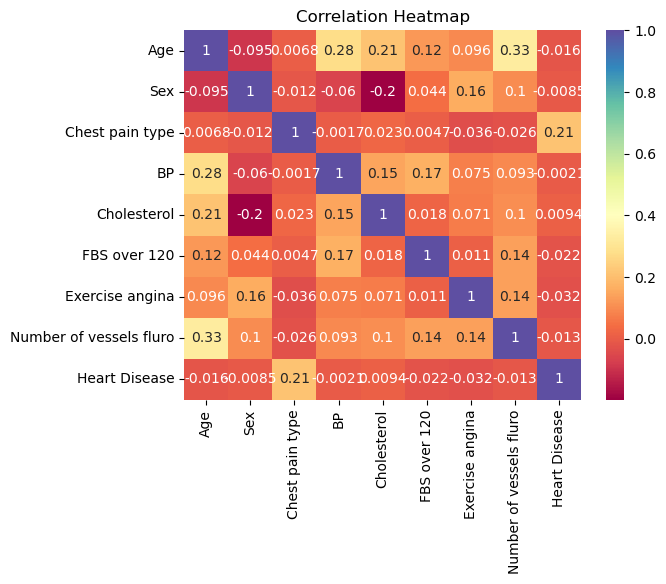

In [25]:
# Correlation matrix
correlation_matrix = heart_data_clean.corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Heatmap')
# Save the figure
plt.savefig("./Fig14.png")
plt.show()


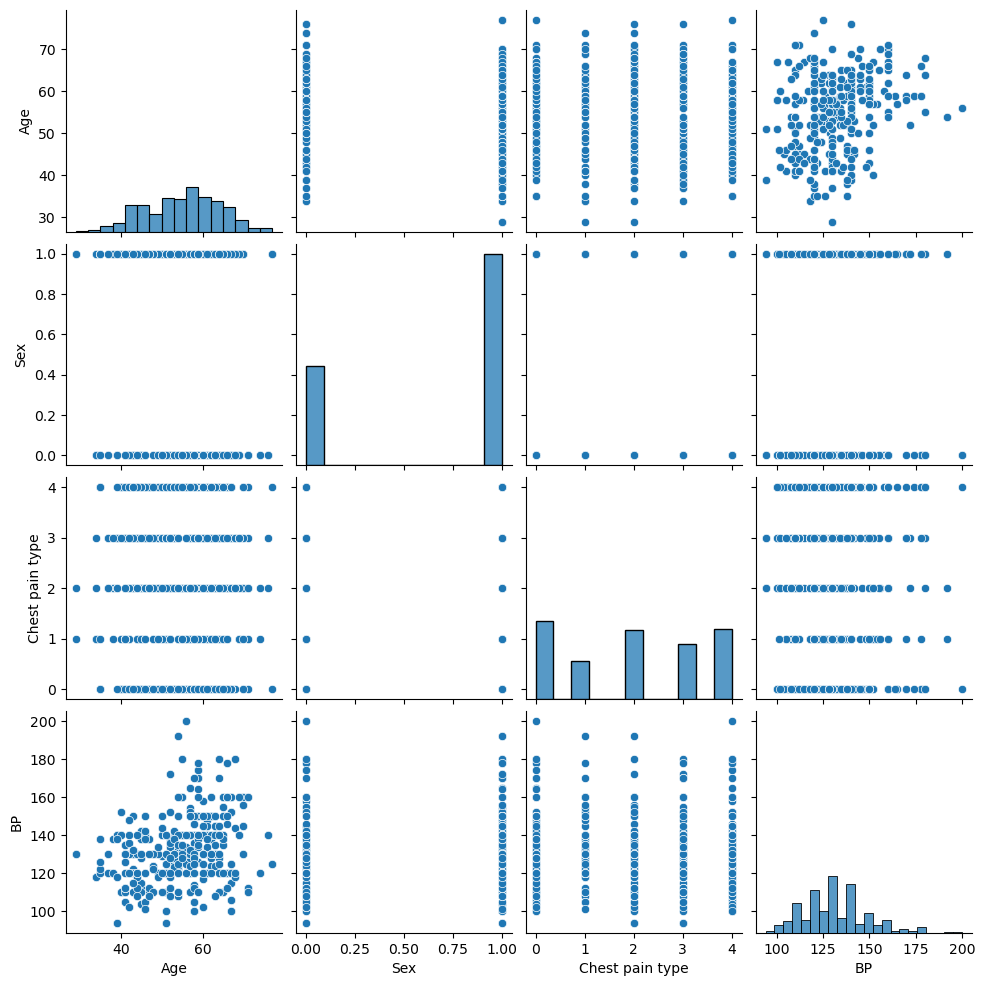

In [26]:
sns.pairplot(data=heart_data_clean.iloc[:,:4])